In [1]:
%matplotlib inline

In [58]:
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz as pgv
import pydot
from collections import defaultdict
from scipy import stats, misc
matplotlib.style.use('ggplot')

In [92]:
WEIGHT = 'weight'
COST = 'cost'

PLAZA_ARMENIA = 'Plaza Immigrantes\nde Armenia'
ROSEDAL = 'El Rosedal'
RECOLETA = 'Recoleta Cemetery'
OBELISCO = 'Obelisco'
PLAZA_SAN_MARTIN = 'Plaza San Martin'
CASA_ROSADA = 'Casa Rosada'
PUENTE_MUJER = 'Puente de la Mujer'
MAFALDA = 'Mafalda'

PUBLIC_TRANSPORT_DATA = {PLAZA_ARMENIA: {ROSEDAL: {WEIGHT: 29, COST: 6.25},
                                        RECOLETA: {WEIGHT: 44, COST: 6.25},
                                        OBELISCO: {WEIGHT: 28, COST: 7.50},
                                        PLAZA_SAN_MARTIN: {WEIGHT: 41, COST: 12.75}},
                         ROSEDAL: {RECOLETA: {WEIGHT: 34, COST: 6.25}}, 
                         RECOLETA: {OBELISCO: {WEIGHT: 24, COST: 6.00},
                                   PLAZA_SAN_MARTIN: {WEIGHT: 22, COST: 6.25}},
                         OBELISCO: {PLAZA_SAN_MARTIN: {WEIGHT: 16, COST: 6.25},
                                   CASA_ROSADA: {WEIGHT: 9, COST: 7.50},
                                   PUENTE_MUJER: {WEIGHT: 13, COST: 7.50},
                                   MAFALDA: {WEIGHT: 25, COST: 6.25}},
                         PLAZA_SAN_MARTIN: {CASA_ROSADA: {WEIGHT: 21, COST: 6.00},
                                           PUENTE_MUJER: {WEIGHT: 22, COST: 6.00},
                                           MAFALDA: {WEIGHT: 24, COST: 6.00}},
                         CASA_ROSADA: {PUENTE_MUJER: {WEIGHT: 18, COST: 6.00},
                                       MAFALDA: {WEIGHT: 13, COST: 6.00}},
                         PUENTE_MUJER: {MAFALDA: {WEIGHT: 15, COST: 6.00}}
                }

WALKING_DATA = {PLAZA_ARMENIA: {ROSEDAL: {WEIGHT: 31, COST: 0.00},
                                RECOLETA: {WEIGHT: 51, COST: 0.00},
                                OBELISCO: {WEIGHT: 63, COST: 0.00},
                                PLAZA_SAN_MARTIN: {WEIGHT: 65, COST: 0.00}},
                 ROSEDAL: {RECOLETA: {WEIGHT: 43, COST: 0.00}}, 
                 RECOLETA: {OBELISCO: {WEIGHT: 31, COST: 0.00},
                           PLAZA_SAN_MARTIN: {WEIGHT: 28, COST: 0.00}},
                 OBELISCO: {PLAZA_SAN_MARTIN: {WEIGHT: 20, COST: 0.00},
                           CASA_ROSADA: {WEIGHT: 16, COST: 0.00},
                           PUENTE_MUJER: {WEIGHT: 25, COST: 0.00},
                           MAFALDA: {WEIGHT: 25, COST: 0.00}},
                 PLAZA_SAN_MARTIN: {CASA_ROSADA: {WEIGHT: 24, COST: 0.00},
                                   PUENTE_MUJER: {WEIGHT: 27, COST: 0.00},
                                   MAFALDA: {WEIGHT: 34, COST: 0.00}},
                 CASA_ROSADA: {PUENTE_MUJER: {WEIGHT: 14, COST: 0.00},
                               MAFALDA: {WEIGHT: 12, COST: 0.00}},
                 PUENTE_MUJER: {MAFALDA: {WEIGHT: 19, COST: 0.00}}
            }

public_transport_graph = nx.from_dict_of_dicts(PUBLIC_TRANSPORT_DATA)
walking_graph = nx.from_dict_of_dicts(WALKING_DATA)

public_transport_edge_labels = {}
walking_edge_labels = {}

for e in public_transport_graph.edges_iter():
    data = public_transport_graph.get_edge_data(*e)
    public_transport_edge_labels[e] = '{weight}min // ${cost:.2f}'.format(weight=data[WEIGHT], cost=data[COST])
    
for e in walking_graph.edges_iter():
    data = walking_graph.get_edge_data(*e)
    walking_edge_labels[e] = '{weight}min'.format(weight=data[WEIGHT])

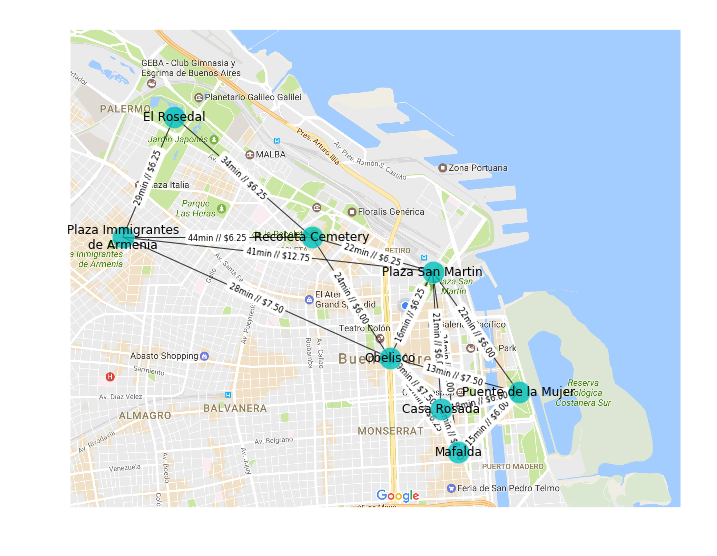

In [85]:
plt.figure(figsize=(12, 10), dpi=800)
background = misc.imread('background.png')
plt.imshow(background, zorder=0)

#public_transport_layout = nx.drawing.nx_pydot.graphviz_layout(public_transport_graph, k=2)
manual_layout = {PLAZA_ARMENIA: (150, 600),
                 ROSEDAL: (300, 250),
                 RECOLETA: (700, 600),
                 OBELISCO: (925, 950),
                 PLAZA_SAN_MARTIN: (1050, 700),
                 CASA_ROSADA: (1075, 1100),
                 PUENTE_MUJER: (1300, 1050),
                 MAFALDA: (1125, 1225)
                }
nx.draw(public_transport_graph, manual_layout, with_labels=True, node_color='c', 
        alpha=0.8, node_size=500, font_size=12)
labels = nx.draw_networkx_edge_labels(public_transport_graph, manual_layout, 
                                      public_transport_edge_labels, font_size=8)


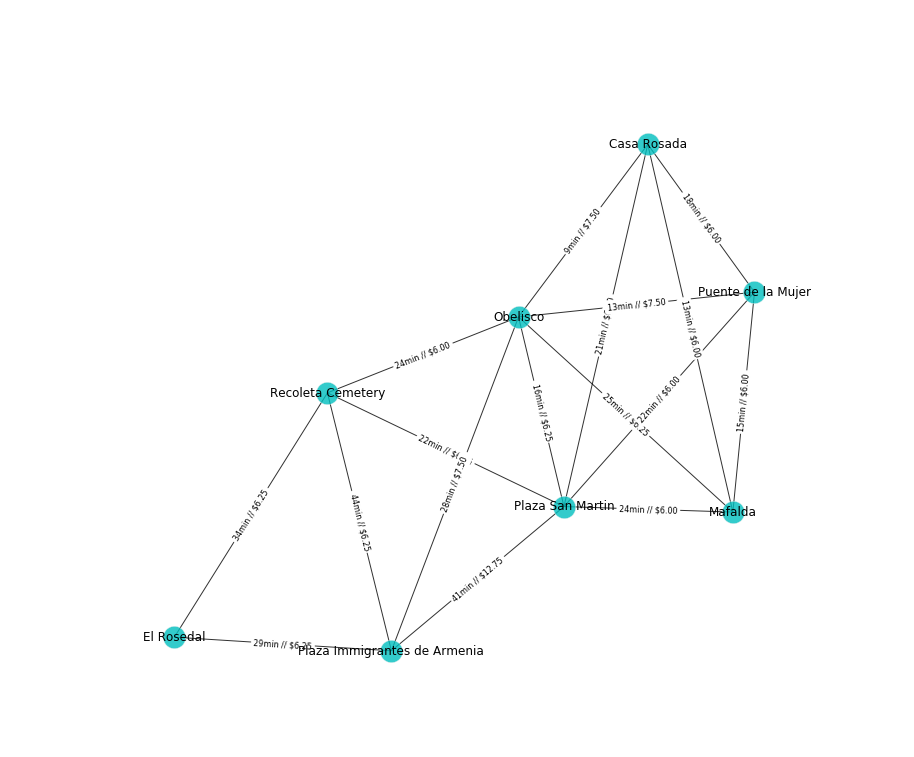

In [80]:
plt.figure(figsize=(12, 10), dpi=800)
public_transport_layout = nx.drawing.nx_pydot.graphviz_layout(public_transport_graph, k=2)
nx.draw(public_transport_graph, public_transport_layout, with_labels=True, node_color='c', 
        alpha=0.8, node_size=500, font_size=12)
labels = nx.draw_networkx_edge_labels(public_transport_graph, public_transport_layout, 
                                      public_transport_edge_labels, font_size=8)


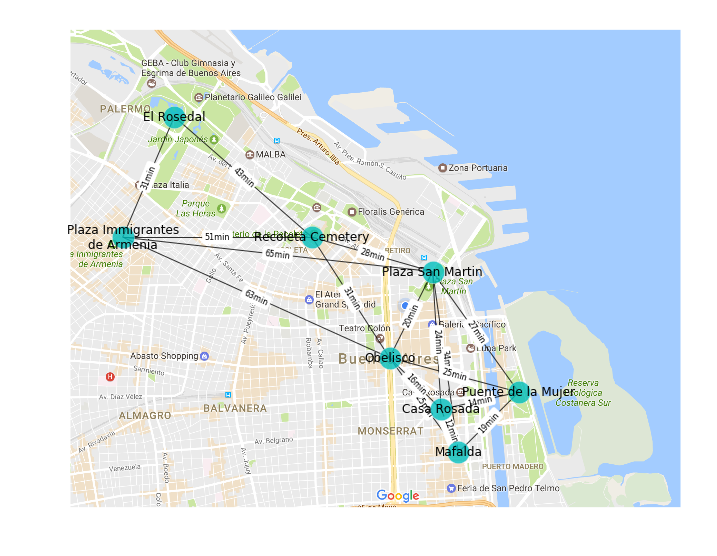

In [87]:
plt.figure(figsize=(12, 10), dpi=800)
background = misc.imread('background.png')
plt.imshow(background, zorder=0)

#public_transport_layout = nx.drawing.nx_pydot.graphviz_layout(public_transport_graph, k=2)
manual_layout = {PLAZA_ARMENIA: (150, 600),
                 ROSEDAL: (300, 250),
                 RECOLETA: (700, 600),
                 OBELISCO: (925, 950),
                 PLAZA_SAN_MARTIN: (1050, 700),
                 CASA_ROSADA: (1075, 1100),
                 PUENTE_MUJER: (1300, 1050),
                 MAFALDA: (1125, 1225)
                }
nx.draw(walking_graph, manual_layout, with_labels=True, node_color='c', 
        alpha=0.8, node_size=500, font_size=12)
labels = nx.draw_networkx_edge_labels(walking_graph, manual_layout, walking_edge_labels, font_size=8)



In [10]:
"""An OOP wrapper of Python's built-in heapq - a min heap
"""

import heapq


class MinHeap(object):
    def __init__(self, data=None):
        if data is not None:
            self.heap = heapq.heapify(data)

        else:
            self.heap = []

    def push(self, item):
        heapq.heappush(self.heap, item)

    def pop(self):
        return heapq.heappop(self.heap)

    def push_pop(self, item):
        return heapq.heappushpop(self.heap, item)

    def n_smallest(self, n):
        return heapq.nsmallest(n, self.heap)

    def n_largest(self, n):
        return heapq.nsmallest(n, self.heap)

    def peek(self):
        return self.heap[0]

    def heapify(self):
        heapq.heapify(self.heap)

    def __len__(self):
        return len(self.heap)

    def __str__(self):
        return str(self.heap)

    def __getitem__(self, item):
        return self.heap.__getitem__(item)


In [93]:
def dijkstra(graph, start, finish, cost_function):
    frontier = MinHeap()
    frontier.push((start, 0))
    came_from = {start: (None, 0)}
    checked_edges = set()

    while len(frontier):
        current, current_cost = frontier.pop()

        if current == finish:
            path = [current]
            while current != start:
                current = came_from[current][0]
                path.append(current)
            path.reverse()
            return path, current_cost

        neighbors = graph.neighbors(current)

        for neighbor in neighbors:
            # sorting to be agnostic of order, as graph is undirected
            edge = tuple(sorted((current, neighbor))) 
            if edge in checked_edges:
                continue
            else:
                checked_edges.add(edge)
            
            neighbor_cost = current_cost + cost_function(graph.get_edge_data(current, neighbor))
            
            # Visited before, and new cost higher than old cost:
            if neighbor in came_from and neighbor_cost >= came_from[neighbor][1]:
                continue
            
            came_from[neighbor] = (current, neighbor_cost)
            frontier.push((neighbor, neighbor_cost))

    return None

def distance_cost_function(data_dict):
    return data_dict[WEIGHT]

def price_cost_function(data_dict):
    return data_dict[COST]

def combined_cost_function_generator(minutes_per_peso, hassle=0):
    def cost_function(data_dict):
        return data_dict[WEIGHT] + (minutes_per_peso * data_dict[COST]) + (hassle * (data_dict[COST] > 0))
    
    return cost_function

In [98]:
#print dijkstra(public_transport_graph, ROSEDAL, CASA_ROSADA, distance_cost_function)
#print dijkstra(walking_graph, ROSEDAL, CASA_ROSADA, distance_cost_function)

minutes_per_peso = 0.26
hassle = 10
cost_func = combined_cost_function_generator(cost_per_minute, hassle)

print dijkstra(public_transport_graph, ROSEDAL, CASA_ROSADA, cost_func)
print dijkstra(walking_graph, ROSEDAL, CASA_ROSADA, cost_func)

print dijkstra(public_transport_graph, RECOLETA, PUENTE_MUJER, cost_func)
print dijkstra(walking_graph, RECOLETA, PUENTE_MUJER, cost_func)

print dijkstra(public_transport_graph, PLAZA_ARMENIA, MAFALDA, cost_func)
print dijkstra(walking_graph, PLAZA_ARMENIA, MAFALDA, cost_func)

print dijkstra(public_transport_graph, OBELISCO, PLAZA_SAN_MARTIN, cost_func)
print dijkstra(walking_graph, OBELISCO, PLAZA_SAN_MARTIN, cost_func)

print dijkstra(public_transport_graph, ROSEDAL, PLAZA_ARMENIA, cost_func)
print dijkstra(walking_graph, ROSEDAL, PLAZA_ARMENIA, cost_func)


(['El Rosedal', 'Plaza Immigrantes\nde Armenia', 'Obelisco', 'Casa Rosada'], 106.625)
(['El Rosedal', 'Plaza Immigrantes\nde Armenia', 'Obelisco', 'Casa Rosada'], 110.0)
(['Recoleta Cemetery', 'Obelisco', 'Puente de la Mujer'], 63.75)
(['Recoleta Cemetery', 'Plaza San Martin', 'Puente de la Mujer'], 55.0)
(['Plaza Immigrantes\nde Armenia', 'Obelisco', 'Mafalda'], 79.875)
(['Plaza Immigrantes\nde Armenia', 'Obelisco', 'Mafalda'], 88.0)
(['Obelisco', 'Plaza San Martin'], 29.125)
(['Obelisco', 'Plaza San Martin'], 20.0)
(['El Rosedal', 'Plaza Immigrantes\nde Armenia'], 42.125)
(['El Rosedal', 'Plaza Immigrantes\nde Armenia'], 31.0)


In [109]:
nodes = public_transport_graph.nodes()
weighted_results = []

for first_node_index in range(len(nodes)):
    for second_node_index in range(first_node_index + 1, len(nodes)):
        first_node = nodes[first_node_index]
        second_node = nodes[second_node_index]
            
        walking_cost = dijkstra(walking_graph, first_node, second_node, distance_cost_function)[1]
        weighted_cost = dijkstra(public_transport_graph, first_node, second_node, cost_func)[1]
        weighted_results.append((walking_cost, weighted_cost - walking_cost))
        

        

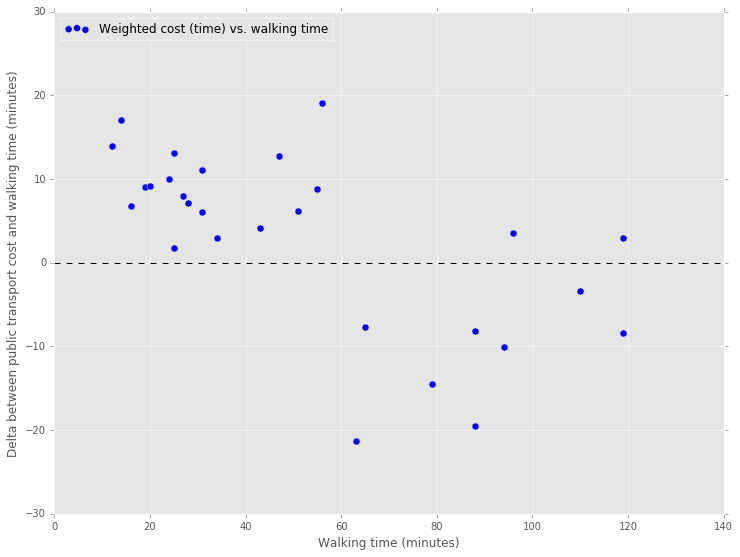

In [121]:
walking, weighted = zip(*sorted(weighted_results))

#regression = stats.linregress(distances, savings)
#m = regression.slope
#b = regression.intercept
#r = regression.rvalue
x_range = np.arange(-20, 150, 10)

plt.figure(figsize=(12, 9))
plt.scatter(walking, weighted, label='Weighted cost (time) vs. walking time', s=50)

#regression_label = r'$y = {m:.3f}x {b:.3f}, \ r={r:.3f}, \ r^2={r2:.3f}$'.format(m=m, b=b, r=r, r2=r**2)
plt.axhline(0, color='black', ls='--')
plt.xlabel('Walking time (minutes)')
plt.ylabel('Delta between public transport cost and walking time (minutes)')
plt.legend(loc=2)

In [18]:
edge_to_savings = {}
walking_distance_to_savings = {}

for e in public_transport_graph.edges_iter():
    public_transport_data = public_transport_graph.get_edge_data(*e)
    walking_data = walking_graph.get_edge_data(*e)
    
    metric = float(walking_data[WEIGHT] - public_transport_data[WEIGHT]) / public_transport_data[COST]
    edge_to_savings[e] = metric
    walking_distance_to_savings[walking_data[WEIGHT]] = metric
    
    

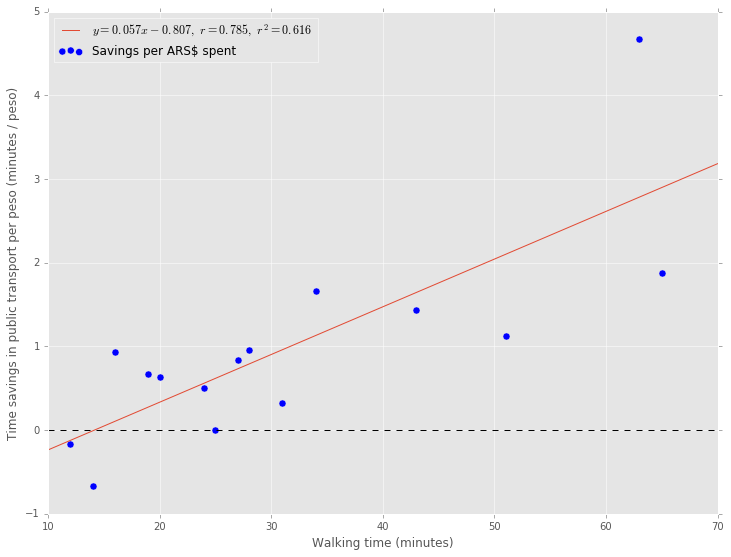

In [128]:
distances, savings = zip(*sorted(walking_distance_to_savings.items()))

regression = stats.linregress(distances, savings)
m = regression.slope
b = regression.intercept
r = regression.rvalue
x_range = np.arange(10, 80, 10)

plt.figure(figsize=(12, 9))
plt.scatter(distances, savings, label='Savings per ARS$ spent', s=50)

regression_label = r'$y = {m:.3f}x {b:.3f}, \ r={r:.3f}, \ r^2={r2:.3f}$'.format(m=m, b=b, r=r, r2=r**2)
plt.plot(x_range, m * x_range + b, label=regression_label)
plt.axhline(0, color='black', ls='--')
plt.xlim(10, 70)
plt.xlabel('Walking time (minutes)')
plt.ylabel('Time savings in public transport per peso (minutes / peso)')
plt.legend(loc=2)


In [41]:
nx.ha

LinregressResult(slope=0.057002650028116317, intercept=-0.80730430258407304, rvalue=0.78474427501433874, pvalue=0.00053050005051487781, stderr=0.012487070632605573)

In [145]:
"""
Implementation adapted from Faridani (2008): 
http://www.ieor.berkeley.edu/~faridani/python.htm
"""

def find_all_paths(graph, start, end, path=[]):
        #http://www.python.org/doc/essays/graphs/
        path = path + [start]
        if start == end:
            return [path]
        
        if start not in graph:
            return []
        
        paths = []
        
        for node in graph[start]:
            if node not in path:
                newpaths = find_all_paths(graph, node, end, path)
                for newpath in newpaths:
                    paths.append(newpath)
                    
        return paths
    
def find_paths(graph):
    cycles = []
    
    for startnode in graph:
        for endnode in graph:
            newpaths = find_all_paths(graph, startnode, endnode)
            for path in newpaths:
                if (len(path) == len(graph)):                    
                    cycles.append(path)
                    
    return cycles

def find_cycle(graph, startnode=None):
    cycles = []
    
    if startnode:
        for endnode in graph:
            newpaths = find_all_paths(graph, startnode, endnode)
            for path in newpaths:
                if (len(path) == len(graph)):
                    if path[0] in graph[path[len(graph)-1]]:
                        path.append(path[0])
                        cycles.append(path)
    else:
        for startnode in graph:
            for endnode in graph:
                newpaths = find_all_paths(graph, startnode, endnode)
                for path in newpaths:
                    if (len(path) == len(graph)):
                        if path[0] in graph[path[len(graph)-1]]:
                            path.append(path[0])
                            cycles.append(path)
    return cycles


def total_cost_per_cycle(cycle, graph):
    total_time = 0
    total_cost = 0
    
    for node_index in range(len(cycle) - 1):
        current_node = cycle[node_index]
        next_node = cycle[node_index + 1]
        edge_data = graph.get_edge_data(current_node, next_node)
        total_time += edge_data[WEIGHT]
        total_cost += edge_data[COST]
        
    return total_time, total_cost
   
    
def find_chepeast_cycle(graph, start):
    cycles = find_cycle(walking_graph, PLAZA_ARMENIA)
    
    min_time = float('Inf')
    min_time_cycle = None
    min_cost = float('Inf')
    min_cost_cycle = None
    
    for cycle in cycles:
        time, cost = total_cost_per_cycle(cycle, graph)
        if time < min_time:
            min_time = time
            min_time_cycle = cycle
        
        if cost < min_cost:
            min_cost = cost
            min_cost_cycle = cycle
            
    return min_time, min_time_cycle, min_cost, min_cost_cycle
    
    

In [146]:
find_chepeast_cycle(public_transport_graph, PLAZA_ARMENIA)

(172,
 ['Plaza Immigrantes\nde Armenia',
  'El Rosedal',
  'Recoleta Cemetery',
  'Plaza San Martin',
  'Puente de la Mujer',
  'Mafalda',
  'Casa Rosada',
  'Obelisco',
  'Plaza Immigrantes\nde Armenia'],
 50.5,
 ['Plaza Immigrantes\nde Armenia',
  'El Rosedal',
  'Recoleta Cemetery',
  'Plaza San Martin',
  'Puente de la Mujer',
  'Casa Rosada',
  'Mafalda',
  'Obelisco',
  'Plaza Immigrantes\nde Armenia'])

In [147]:
find_chepeast_cycle(walking_graph, PLAZA_ARMENIA)

(239,
 ['Plaza Immigrantes\nde Armenia',
  'El Rosedal',
  'Recoleta Cemetery',
  'Plaza San Martin',
  'Puente de la Mujer',
  'Mafalda',
  'Casa Rosada',
  'Obelisco',
  'Plaza Immigrantes\nde Armenia'],
 0.0,
 ['Plaza Immigrantes\nde Armenia',
  'El Rosedal',
  'Recoleta Cemetery',
  'Plaza San Martin',
  'Puente de la Mujer',
  'Mafalda',
  'Casa Rosada',
  'Obelisco',
  'Plaza Immigrantes\nde Armenia'])